In [1]:
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf

c:\Users\kairo\anaconda3\envs\cwq\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preparing Data

In [2]:
low_density = ["4", "20", "148"]
high_density = ["123", "211", "224"]
dataY = []
data = []
names = []
for filename in os.listdir(os.getcwd() + "\data"):
    measure = []
    names.append(filename)
    dense = 0
    for h in high_density:
        if h in filename:  
            dense = 1
    dataY.append(dense)
    with open(os.path.join(os.getcwd() + "\data", filename), 'r') as f: # open in readonly mode
        
        rows = f.read().splitlines()
        for i,r in enumerate(rows):
            if(i < 1000):
                continue
            if(i == 5000):
                break
            col = r.split("\t")
            measure.append(col[1])
        data.append(measure)
        
print(dataY)


[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]


In [3]:
for i, d in enumerate(data):
    if "A" in names[i]:
        print(len(d))
        print(names[i])
        print(i)
data = np.array(data, dtype=float)
x_train = np.empty(data.shape)
for i, d in enumerate(data):
    print(d.mean())
    x_train[i] = d / (d.max() - d.min())
    mean = d.mean()  / (d.max() - d.min())
    x_train[i] = x_train[i] - mean
y_train = np.array(dataY, dtype=float)
print(x_train)


4000
W123A
0
4000
W148A
6
4000
W20A
12
4000
W211A
17
4000
W224A
23
4000
W4A
29
-0.00030250000000000014
-2.175000000000016e-05
-0.00017250000000000015
-1.7750000000000008e-05
-0.00022374999999999977
0.00021650000000000003
-0.00025124999999999995
4.375000000000011e-05
0.00019874999999999998
9.474999999999978e-05
-1.9249999999999817e-05
-2.3500000000000005e-05
0.0001005000000000003
-9.850000000000002e-05
0.0001205000000000002
2.199999999999992e-05
-3.549999999999992e-05
-0.00022475000000000064
0.00025874999999999965
0.0002227499999999992
-0.00018650000000000022
0.00011474999999999982
0.00010999999999999995
-0.00030400000000000034
-0.00044325
-0.00023050000000000002
-6.624999999999983e-05
2.9500000000000046e-05
-5.275000000000002e-05
0.0001859999999999999
-3.350000000000041e-05
-0.00012525000000000004
2.7000000000000046e-05
0.00010199999999999985
3.725000000000003e-05
[[ 1.52010050e-03  1.65954774e-02  6.54522613e-03 ... -1.35552764e-02
  -1.85804020e-02 -1.35552764e-02]
 [-1.03497921e-02 

Here's what the data looks like, I've removed time information

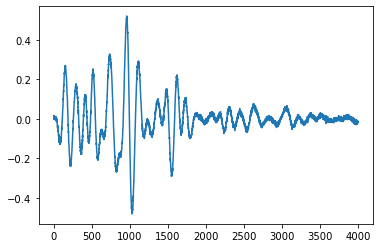

1.0


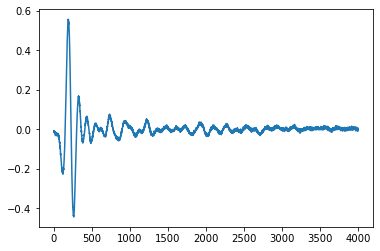

1.0


In [4]:
for i in range(2):
    plt.plot(x_train[i])
    plt.show()
    print(y_train[i])

In [5]:
print(f"Training labels has shape: {y_train.shape} and dtype: {y_train.dtype}")
print(f"Training images has shape: {x_train.shape} and dtype: {x_train.dtype}")

Training labels has shape: (35,) and dtype: float64
Training images has shape: (35, 4000) and dtype: float64


# Train Autoencoder

In [6]:
def create_dataset(data, dataY, batch_size):

    # Generate a TF Dataset from the series values
    dataY = np.reshape(dataY, (-1, 1))
    dataset = tf.data.Dataset.from_tensor_slices((data, dataY))
    dataset = tf.data.Dataset.shuffle(dataset, buffer_size=30)
    # for x, y in dataset:
    #     print(x.numpy(), y.numpy())
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [31]:
class Autoencoder(tf.keras.models.Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
            #tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dim, activation='relu'),
            tf.keras.layers.Dense(latent_dim//2, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(tf.math.reduce_prod(shape), activation='tanh'),
            #tf.keras.layers.Reshape(shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

shape = x_train.shape[1:]
print(shape)
latent_dim = 32
autoencoder = Autoencoder(latent_dim, shape)

(4000,)


In [32]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')

In [49]:
#dataset = create_dataset(data, data, 5)
print(data.shape)
autoencoder.fit(x_train, x_train, epochs = 300, shuffle=True)

(35, 4000)
Epoch 1/300
2/2 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 2/300
2/2 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 3/300
2/2 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 4/300
2/2 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 5/300
2/2 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 6/300
2/2 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 7/300
2/2 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 8/300
2/2 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 9/300
2/2 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 10/300
2/2 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 11/300
2/2 [==============================] - 0s 11ms/step - loss: 0.0012
Epoch 12/300
2/2 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 13/300
2/2 [==========================

In [50]:
encoded_imgs = autoencoder.encoder(x_train).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

Here we see the predicted signal from the compressed latent space

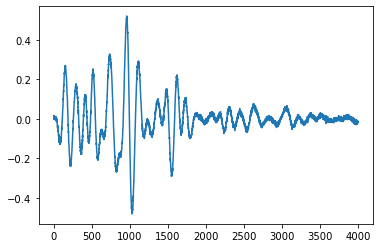

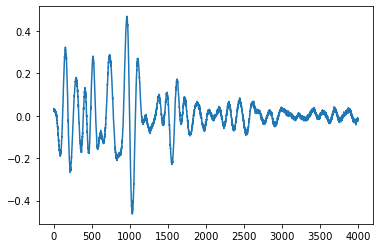

In [51]:
plt.plot(x_train[0])
plt.show()
plt.plot(decoded_imgs[0])
plt.show()

Graphed on top of each other

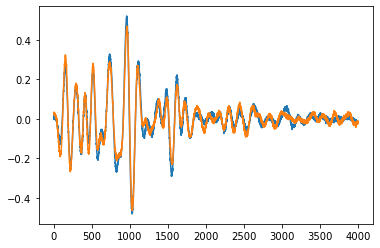

In [60]:
plt.plot(x_train[0])
plt.plot(decoded_imgs[0])
plt.show()

We can pick 3 random indicies of the encoded vector and graph it in spacce
One can see that there's lots of overlap, no clear separation, red is dense, blue is not

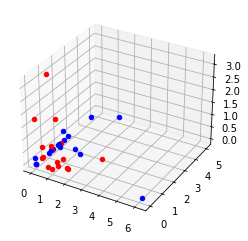

In [61]:
def plot_3d(ind):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for i, d in enumerate(encoded_imgs):
        if(dataY[i] == 1):
            ax.scatter(d[ind[0]],d[ind[1]],d[ind[2]], c='red')
        else:
            ax.scatter(d[ind[0]],d[ind[1]],d[ind[2]], c='blue')
plot_3d((1,2,3))

# Train Classifier
Here we train a model on the encoded data, classifying it into dense and not

In [54]:
def create_model():
  model = tf.keras.models.Sequential([
      #tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  return model

In [55]:
dataset = create_dataset(encoded_imgs, y_train, 5)
#val_dataset = create_dataset(x_test, y_test, 1)
#print(dataset.shape)

model = create_model()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])


It takes a while to converge cause there are so few weights

In [56]:
history = model.fit(dataset, epochs = 300, verbose=2)

Epoch 1/300
7/7 - 1s - loss: 1.0428 - accuracy: 0.4857 - 645ms/epoch - 92ms/step
Epoch 2/300
7/7 - 0s - loss: 0.5901 - accuracy: 0.7143 - 23ms/epoch - 3ms/step
Epoch 3/300
7/7 - 0s - loss: 0.4396 - accuracy: 0.8000 - 25ms/epoch - 4ms/step
Epoch 4/300
7/7 - 0s - loss: 0.3800 - accuracy: 0.8286 - 25ms/epoch - 4ms/step
Epoch 5/300
7/7 - 0s - loss: 0.3420 - accuracy: 0.8571 - 24ms/epoch - 3ms/step
Epoch 6/300
7/7 - 0s - loss: 0.3240 - accuracy: 0.8571 - 25ms/epoch - 4ms/step
Epoch 7/300
7/7 - 0s - loss: 0.3278 - accuracy: 0.8571 - 24ms/epoch - 3ms/step
Epoch 8/300
7/7 - 0s - loss: 0.3040 - accuracy: 0.8286 - 24ms/epoch - 3ms/step
Epoch 9/300
7/7 - 0s - loss: 0.3001 - accuracy: 0.8571 - 26ms/epoch - 4ms/step
Epoch 10/300
7/7 - 0s - loss: 0.2843 - accuracy: 0.8571 - 24ms/epoch - 3ms/step
Epoch 11/300
7/7 - 0s - loss: 0.2886 - accuracy: 0.8286 - 25ms/epoch - 4ms/step
Epoch 12/300
7/7 - 0s - loss: 0.2788 - accuracy: 0.8857 - 23ms/epoch - 3ms/step
Epoch 13/300
7/7 - 0s - loss: 0.2769 - accuracy

Here we see the relative importance of each weight in the encoder

In [57]:
w = model.weights
absw = np.absolute(w[0])
absw = absw.reshape(16)
first = 0
second = 0
third = 0
for i, n in enumerate(absw):
    if n > absw[first]: 
        third = second
        second = first
        first = i
    elif n > absw[second]:
        third = second
        second = i
    elif n > absw[third]:
        third = i
print(absw)
print(first, second, third)

# indicies = np.expand_dims(np.arange(1,17,dtype='float32'), axis=1)
# print(indicies.shape)
# weights = np.hstack([indicies, absw])
# weights = weights.argsort()
# print(weights)

[ 5.7386174   1.1665251   3.6797693   9.554429    1.6432382   0.6894486
  1.0408425   0.93572825  1.8216945   0.29787233  3.5927067   0.4684133
 10.292842    5.5503573   0.8298441   0.5653782 ]
12 3 0


plotting the 3 most relavant indicies, we can see clear separation 

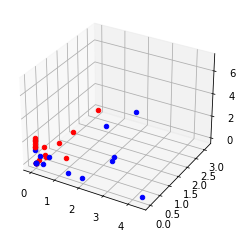

In [58]:
plot_3d((first, second, third))

# Wavelet Analysis

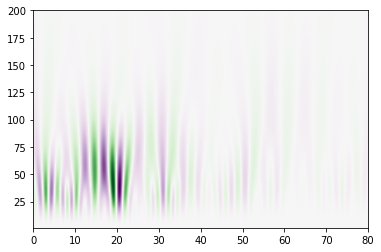

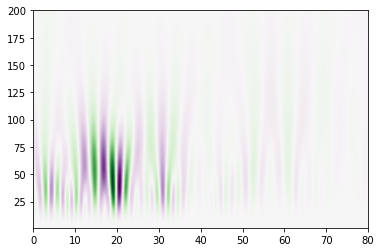

In [62]:
from scipy import signal


def plot_wavelet(w, sig):
    widths = np.arange(1, w)
    wavepacket = signal.cwt(sig, signal.ricker, widths)
    plt.imshow(np.flipud(wavepacket), extent=[0, decoded_imgs.shape[1] * 0.02, 1, w], cmap='PRGn', aspect='auto',
            vmax=abs(wavepacket).max(), vmin=-abs(wavepacket).max())
    plt.show()
plot_wavelet(200, decoded_imgs[0])
plot_wavelet(200, data[0])

In [105]:
print(encoded_imgs[-6])
print(encoded_imgs[0])

[1.1781838  0.         1.2959435  0.         0.         2.446888
 0.         1.5109812  0.         0.         0.         0.
 0.         1.7195659  0.19626808 0.13670026]
[0.         2.7110085  1.6817721  0.         0.         0.
 0.         0.         0.         0.22019061 0.         2.8245032
 0.         0.         0.         0.        ]


(1, 16)


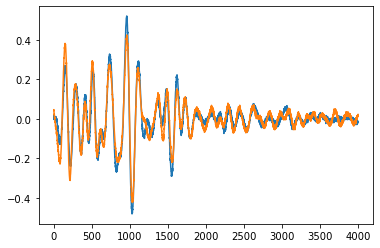

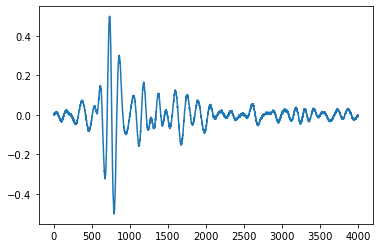

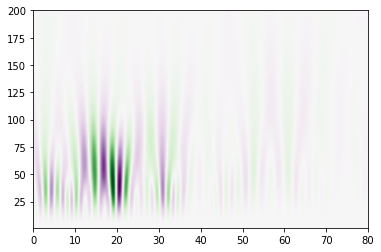

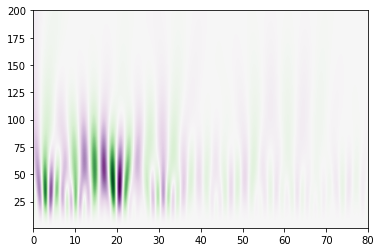

In [106]:
img = np.array(encoded_imgs[0])
img[0] = 1.0
img = np.expand_dims(img, axis=0)
print(img.shape)
img_dec = autoencoder.decoder(img).numpy()

plt.plot(x_train[0])
plt.plot(img_dec[0])
plt.show()

plt.plot(x_train[-6])
plt.show()


plot_wavelet(200, x_train[0])
plot_wavelet(200, img_dec[0])

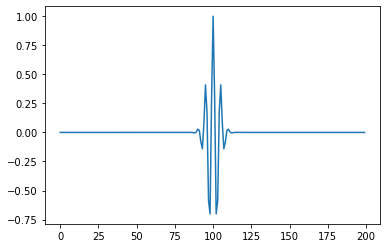

In [126]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = signal.gausspulse(t, fc=20)
plt.plot(sig)

c:\Users\kairo\anaconda3\envs\cwq\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


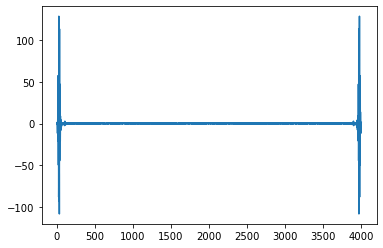

In [131]:
#from scipy.fft import fft, fftfreq

spec = fft(x_train[34])
plt.plot(spec)
